In [1]:
import scanpy as sc
sc.settings.figdir = "../results/reduction/"
sc._settings.settings._vector_friendly=True
import scanpy.external as sce

In [2]:
adata = sc.read("../../important_processed_data/5.22_integrate_adata.h5ad")

In [5]:
adata.obsm["X_pca"]  = adata.obsm["X_scANVI"]

In [6]:
pbmc = sce.tl.trimap(adata, copy=True,n_components=15)

/home/zhanglab/mambaforge/envs/py311/lib/python3.11/site-packages/trimap/trimap_.py:747: UserWarning: 'weight_adj' is deprecated and will not be applied. Adjust 'weight_temp' if needed.
  warnings.warn(


TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=euclidean, weight_temp=0.5, lr=1000.0, n_iters=400, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 272369 points with dimension 15
pre-processing
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100 /  400, Loss: 0.092, Violated triplets: 2.2941
Iteration:  200 /  400, Loss: 0.090, Violated triplets: 2.3893
Iteration:  300 /  400, Loss: 0.090, Violated triplets: 2.4360
Iteration:  400 /  400, Loss: 0.089, Violated triplets: 2.4626
Elapsed time: 4:12:22.616154


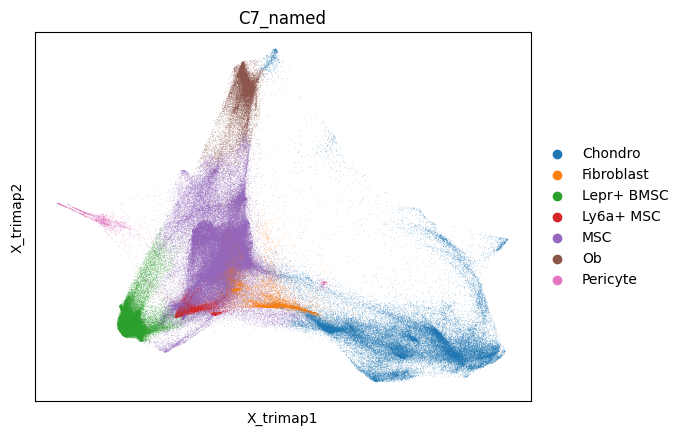

In [11]:
sc.pl.embedding(pbmc,basis = "X_trimap",color="C7_named",save="_trimap")

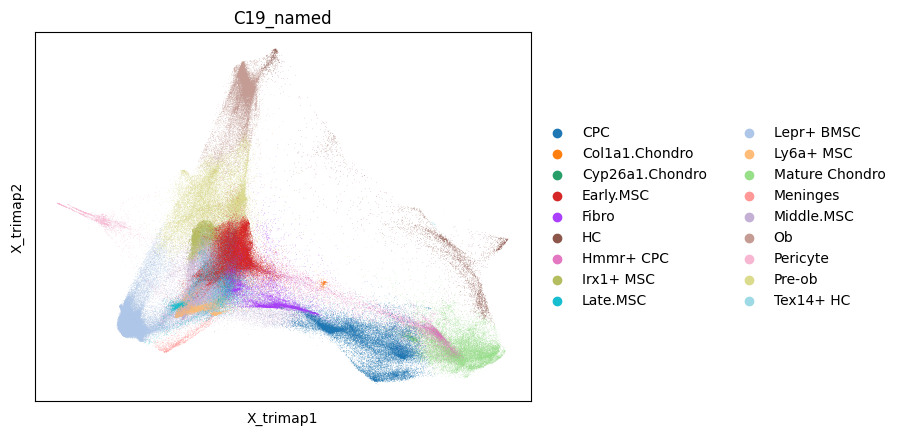

In [12]:
sc.pl.embedding(pbmc,basis = "X_trimap",color="C19_named",save="_C19_trimap")

In [13]:
trimap_reduction = pbmc.obsm["X_trimap"]

In [16]:
import pandas as pd
trimap_reduction = pd.DataFrame(trimap_reduction)

In [18]:
trimap_reduction.index = pbmc.obs_names

In [19]:
!mkdir ../process/reduction

In [20]:

trimap_reduction.to_csv("../process/trimap_reduction.csv")